<a href="https://colab.research.google.com/github/antonia-04/Inteligenta-artificiala-UBB-teme/blob/main/AI_laborator_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install azure-cognitiveservices-vision-computervision
!pip install pillow
!pip install matplotlib-venn
!pip install azure-ai-vision
!pip install azure-ai-formrecognizer
!pip install azure-ai
!pip install hamming
!pip install python-Levenshtein

In [4]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time

In [5]:
import os

os.environ["VISION_KEY"] = "7FSFFOCsYuGHxj4xkrgBNH3cuUj18niKbtxhmoJLQBR95DwjEMW6JQQJ99BCACi5YpzXJ3w3AAAFACOGauX9"
os.environ["VISION_ENDPOINT"] = "https://ai-laborator1.cognitiveservices.azure.com/"


In [6]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

In [9]:
# img = open("test1.png", "rb")
img = open("test2.jpeg", "rb")
read_response = computervision_client.read_in_stream(
    image=img,
    mode="Printed",
    raw=True
)
# print(read_response.as_dict())

operation_id = read_response.headers['Operation-Location'].split('/')[-1]
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
result = []
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            result.append(line.text)

print()

Lucces in resolvarea
TEMELOR la
LABORA toarele de
Inteligenta Artificialà!



In [10]:
# get/define the ground truth
# groundTruth = ["Google Cloud", "Platform"]
groundTruth = ["Succes in rezolvarea", "tEMELOR la", "LABORAtoaree de", "Inteligenta Artificiala!"]

# compute the performance
noOfCorrectLines = sum(i == j for i, j in zip(result, groundTruth))
print(noOfCorrectLines)

0


## Cerinte laborator
Specificaţi, implementaţi și testați subalgoritmi pentru problema enuntata. Sa se determine:

1. calitatea procesului de recunoastere a textului, atat la nivel de caracter, cat si la nivel de cuvant
a. prin folosirea unei metrici de distanta sau
b. prin folosirea mai multor metrici de distanta.
2. calitatea localizarii corecte a textului in imagine
3. posibilitati de imbunatatire a recunoasterii textului

In [17]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes, VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


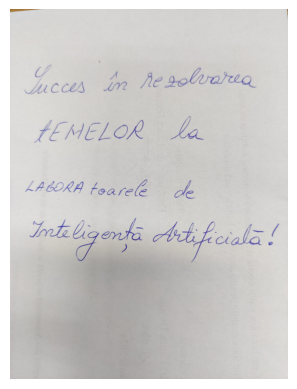

  Succes in rezolvarea
    Succes
    in
    rezolvarea
  TEMELOR la
    TEMELOR
    la
  LABORA toarele de
    LABORA
    toarele
    de
  Inteligentà Artificialà!
    Inteligentà
    Artificialà!

Rezultat obtinut: 

Succes in rezolvarea TEMELOR la LABORA toarele de Inteligentà Artificialà! 


In [23]:
client = ImageAnalysisClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(subscription_key)
)

# deschide si citeste fisierul ca binar
with open("test2.jpeg", "rb") as imageFile:
    imageData = imageFile.read()

# analiza imaginii cu Azure sa citim
result = client.analyze(
    image_data=imageData,
    visual_features=[VisualFeatures.READ]
)

# textul citit
resultRead = ""

if result.read is not None:

    image = Image.open("/content/test2.jpeg")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # itereaza prin blocurile de text recunoscute
    # Azure imparte in blocuri de text in functie de cum sunt plasate
    for line in result.read.blocks[0].lines:
        print(f"  {line.text}")  # linia din bloc
        resultRead += str(line.text) + " "

        # iterează prin cuvintele din fiecare linie
        for word in line.words:
            print(f"    {word.text}")
    print("\nRezultat obtinut: \n")
    print(resultRead)



In [24]:
actualText = "Succes în rezolvarea tEMELOR la LABORAtoarele de Inteligență Artificială!"

https://www.geeksforgeeks.org/introduction-to-levenshtein-distance/

Comparam calitatea daca facem distanta Levenshtein intre ce s-a detectat si ce scrie

## Metrici de Distanță pentru Evaluarea OCR

Pentru a evalua calitatea recunoașterii textului în cadrul OCR, se folosesc metrici de distanță care măsoară diferențele dintre textul recunoscut și textul corect (ground truth). Aceste metrici pot fi aplicate la nivel de caracter sau nivel de cuvânt.

### 1. Levenshtein Distance
Levenshtein măsoară numărul minim de operații necesare pentru a transforma un șir într-altul, permițând:
- inserare, stergere, inlocuire

Exemplu:
- "casa" → "masa" (1 schimbare: 'c' → 'm')
- "ai" → "hai" (1 inserare: 'h')

**Avantaje**: Funcționează bine pentru majoritatea greșelilor OCR.  
**Dezavantaje**: Nu ține cont de transpoziția caracterelor și poate fi costisitor pentru șiruri lungi.

### 2. Damerau-Levenshtein Distance
Damerau-Levenshtein extinde Levenshtein adăugând o operație suplimentară: transpoziția a două caractere adiacente.  
Exemplu:
- "teh" → "the" (1 transpoziție în loc de 2 operații Levenshtein)

**Avantaje**: Este mai potrivit pentru greșelile de tastare și OCR unde apar inversiuni accidentale de caractere.  
**Dezavantaje**: Costul computațional este mai mare decât cel al Levenshtein simplu.

### 3. Hamming Distance
Hamming numără doar înlocuirile de caractere, dar funcționează doar dacă lungimile celor două șiruri sunt egale.  
Exemplu:
- "casa" → "masa" (1 schimbare: 'c' → 'm')

**Avantaje**: Eficient pentru comparații rapide între texte de lungime fixă.  
**Dezavantaje**: Nu poate gestiona inserări sau ștergeri, deci este limitat în analiza erorilor OCR.

### 4. Jaro-Winkler Similarity
Jaro-Winkler măsoară asemănarea dintre două șiruri, returnând o valoare între 0 și 1, unde 1 înseamnă șiruri identice. Oferă mai multă importanță primelor caractere din cuvinte, ceea ce îl face util pentru OCR, unde începutul unui cuvânt este adesea recunoscut mai bine.  
Exemplu:
- "MARIA" → "MARTA" = 0.87 (mare asemănare)
- "MARIA" → "LUISA" = 0.56 (diferență mare)

**Avantaje**: Potrivit pentru greșelile OCR unde începutul cuvântului este recunoscut corect.  
**Dezavantaje**: Nu funcționează bine pentru diferențe mari de lungime.


In [26]:
# 1. calitatea procesului de recunoastere a textului, atat la nivel de caracter, cat si la nivel de cuvant
# a. prin folosirea unei metrici de distanta sau
# b. prin folosirea mai multor metrici de distanta.

In [36]:
import Levenshtein

# distanta intre 2 propozitii
def levenshteinSentenceLevel(textRecognized, textGroundTruth):
    distance = Levenshtein.distance(textRecognized, textGroundTruth)
    return distance

# distanta intre cuvintele din propozitii
def levenshteinWordLevel(textRecognized, textGroundTruth):
    wordsRecognized = textRecognized.split()
    wordsGroundTruth = textGroundTruth.split()

    # comparam cat timp sunt cuvinte in ambele
    minLength = min(len(wordsRecognized), len(wordsGroundTruth))

    totalDistance = 0
    for i in range(minLength):
        distance = Levenshtein.distance(wordsRecognized[i], wordsGroundTruth[i])
        totalDistance += distance

    # daca exista cuvinte în plus în oricare din propoziții le adăugăm ca distanta
    totalDistance += abs(len(wordsRecognized) - len(wordsGroundTruth))

    return totalDistance


sentenceDistance = levenshteinSentenceLevel(resultRead, actualText)
print(f"Sentence Levenshtein Distance: {sentenceDistance}")

wordDistance = levenshteinWordLevel(resultRead, actualText)
print(f"Words Levenshtein Distance: {wordDistance}")

Sentence Levenshtein Distance: 7
Words Levenshtein Distance: 36


In [37]:
import Levenshtein

# functie pentru calcularea distantei hamming intre doua propozitii de aceeasi lungime
def hammingSentenceLevel(textRecognized, textGroundTruth):
    if len(textRecognized) != len(textGroundTruth):
        raise ValueError("Hamming distance is only defined for strings of equal length")

    return sum(c1 != c2 for c1, c2 in zip(textRecognized, textGroundTruth))

# functie pentru calcularea distantei hamming la nivel de cuvinte
def hammingWordLevel(textRecognized, textGroundTruth):
    wordsRecognized = textRecognized.split()
    wordsGroundTruth = textGroundTruth.split()

    # determina numarul minim de cuvinte comune intre cele doua propozitii
    minLength = min(len(wordsRecognized), len(wordsGroundTruth))

    totalDistance = 0
    # itereaza prin cuvintele comune si calculeaza distanta hamming pentru fiecare pereche
    for i in range(minLength):
        word1 = wordsRecognized[i]
        word2 = wordsGroundTruth[i]

        # daca cuvintele au lungimi diferite, se ridica eroare
        if len(word1) != len(word2):
            raise ValueError("Hamming distance is only defined for words of equal length")

        totalDistance += sum(c1 != c2 for c1, c2 in zip(word1, word2))

    # adauga penalizare pentru diferentele de numar de cuvinte
    totalDistance += abs(len(wordsRecognized) - len(wordsGroundTruth))

    return totalDistance

# calculeaza distanta hamming la nivel de propozitie (daca lungimile sunt egale)
try:
    sentenceDistance = hammingSentenceLevel(resultRead, actualText)
    print(f"Hamming distance (sentence level): {sentenceDistance}")
except ValueError:
    print("Hamming distance (sentence level) cannot be computed because sentence lengths are different.")

# calculeaza distanta hamming la nivel de cuvinte
try:
    wordDistance = hammingWordLevel(resultRead, actualText)
    print(f"Hamming distance (word level): {wordDistance}")
except ValueError:
    print("Hamming distance (word level) cannot be computed because some word lengths are different.")


Hamming distance (sentence level) cannot be computed because sentence lengths are different.
Hamming distance (word level) cannot be computed because some word lengths are different.


In [38]:
import Levenshtein

# functie pentru distanta jaro-winkler intre 2 propozitii
def jaroWinklerSentenceLevel(textRecognized, textGroundTruth):
    return Levenshtein.jaro_winkler(textRecognized, textGroundTruth)

# functie pentru distanta jaro-winkler intre cuvintele din propozitii
def jaroWinklerWordLevel(textRecognized, textGroundTruth):
    wordsRecognized = textRecognized.split()
    wordsGroundTruth = textGroundTruth.split()

    minLength = min(len(wordsRecognized), len(wordsGroundTruth))

    totalSimilarity = 0
    for i in range(minLength):
        similarity = Levenshtein.jaro_winkler(wordsRecognized[i], wordsGroundTruth[i])
        totalSimilarity += similarity

    return totalSimilarity / minLength if minLength > 0 else 0  # media similaritatilor

# calculeaza asemanarea jaro-winkler
sentenceSimilarity = jaroWinklerSentenceLevel(resultRead, actualText)
print(f"Jaro-Winkler similarity (sentence level): {sentenceSimilarity:.4f}")

wordSimilarity = jaroWinklerWordLevel(resultRead, actualText)
print(f"Jaro-Winkler similarity (word level): {wordSimilarity:.4f}")


Jaro-Winkler similarity (sentence level): 0.9470
Jaro-Winkler similarity (word level): 0.7101


In [39]:
import Levenshtein

# functie pentru distanta damerau-levenshtein intre 2 propozitii
def damerauLevenshteinSentenceLevel(textRecognized, textGroundTruth):
    return Levenshtein.distance(textRecognized, textGroundTruth)

# functie pentru distanta damerau-levenshtein intre cuvintele din propozitii
def damerauLevenshteinWordLevel(textRecognized, textGroundTruth):
    wordsRecognized = textRecognized.split()
    wordsGroundTruth = textGroundTruth.split()

    minLength = min(len(wordsRecognized), len(wordsGroundTruth))

    totalDistance = 0
    for i in range(minLength):
        distance = Levenshtein.distance(wordsRecognized[i], wordsGroundTruth[i])
        totalDistance += distance

    totalDistance += abs(len(wordsRecognized) - len(wordsGroundTruth))

    return totalDistance

# calculeaza distanta damerau-levenshtein
sentenceDistance = damerauLevenshteinSentenceLevel(resultRead, actualText)
print(f"Damerau-Levenshtein distance (sentence level): {sentenceDistance}")

wordDistance = damerauLevenshteinWordLevel(resultRead, actualText)
print(f"Damerau-Levenshtein distance (word level): {wordDistance}")


Damerau-Levenshtein distance (sentence level): 7
Damerau-Levenshtein distance (word level): 36


### 2. calitatea localizarii corecte a textului in imagine

Calcularea IoU: Se calculează IoU între poligonul detectat și cel de Ground Truth. Aceasta este raportul dintre aria intersecției celor două poligoane și aria uniunii lor. O valoare mai mare a IoU indică o localizare mai precisă.

$\text{IoU} = \frac{|A \cap B|}{|A \cup B|}$



Text:
Pentru linia 1: ((80, 304), (1342, 304), (1343, 453), (80, 464))
IoU pentru primul poligon (line 1): 0.8310152572328824
Pentru linia 2: ((128, 594), (1042, 583), (1043, 712), (128, 723))
Pentru linia 3: ((78, 912), (1016, 912), (1015, 1037), (76, 1020))
Pentru linia 4: ((105, 1130), (1455, 1156), (1454, 1291), (102, 1260))
IoU pentru al patrulea poligon (line 4): 0.558408858978022


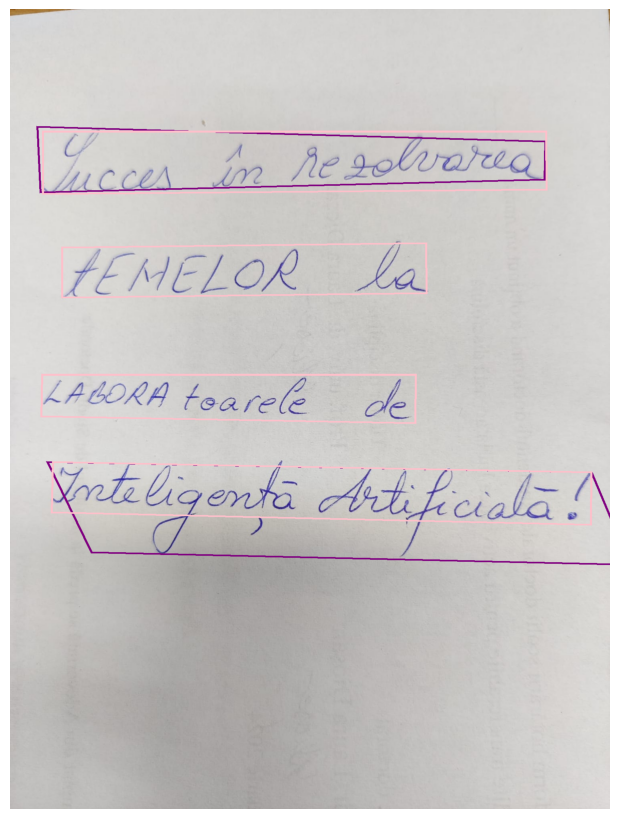

Succes in rezolvarea TEMELOR la LABORA toarele de Inteligentà Artificialà! 


In [67]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# calcularea Intersection over Union (IoU)
def calculateIoU(detectedPolygon, groundTruthPolygon):
    # cream poligoanele
    detectedPoly = Polygon(detectedPolygon)
    groundTruthPoly = Polygon(groundTruthPolygon)

    # intersectia si uniunea poligoanelor
    intersection = detectedPoly.intersection(groundTruthPoly).area
    union = detectedPoly.union(groundTruthPoly).area

    # IoU
    iou = intersection / union
    return iou


resultRead2 = ""

if result.read is not None:
    print("\nText:")

    image = Image.open("test2.jpeg")
    fig = plt.figure(figsize=(10, 8))
    plt.axis('off')
    draw = ImageDraw.Draw(image)
    color = 'pink'

    groundTruth1 = ((74, 460), (66, 292), (1340, 329), (1338, 428))  # Ground truth pentru primul poligon
    groundTruth2 = ((90, 1130), (1455, 1156), (1554, 1391), (202, 1360))  # Ground truth pentru al patrulea poligon

    draw.polygon(groundTruth, outline="purple", width=5)
    draw.polygon(groundTruth2, outline="purple", width=5)

    for idx, line in enumerate(result.read.blocks[0].lines):
        resultRead2 += str(line.text) + " "

        # poligonul de delimitare pentru fiecare linie
        r = line.bounding_polygon
        boundingPolygon = ((r[0].x, r[0].y), (r[1].x, r[1].y), (r[2].x, r[2].y), (r[3].x, r[3].y))
        print(f"Pentru linia {idx+1}: {boundingPolygon}")

        draw.polygon(boundingPolygon, outline=color, width=5)

        if idx == 0:
            # IoU pentru primul poligon
            iou1 = calculateIoU(boundingPolygon, groundTruth1)
            print(f"IoU pentru primul poligon (line 1): {iou1}")
        elif idx == 3:
            # IoU pentru al patrulea poligon
            iou2 = calculateIoU(boundingPolygon, groundTruth2)
            print(f"IoU pentru al patrulea poligon (line 4): {iou2}")

    plt.imshow(image)
    plt.tight_layout(pad=0)
    plt.show()

print(resultRead)


### 3. posibilitati de imbunatatire a recunoasterii textului
